# Capstone Project — The Battle of Neighbourhoods

### Introduction
<p>Ankara is the one of the biggest city of Turkey.</p>
 <p>We plan to move to Ankara to live there. And it's important for us to know where to eat in different parts of Ankara </p> 

With it’s diverse culture , comes diverse food items. There are many restaurants in Ankara, each belonging to different categories like Chinese , Italian , French etc.

So as part of this project , we will list and visualise all major parts of Ankara. </p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in Ankara for Chinese Cuisine ? 
- Which areas have large number of Korean Resturant Market ? 
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in Ankara?

### Data
For this project we need the following data :
<ul>
<li> Ankara Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of Ankara.
     </ul>
<li> Nearby places in each locality of Ankara.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the Ankara city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [27]:
import sys
!{sys.executable} -m pip install sklearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!{sys.executable} install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
!{sys.executable} install geocoder
import geocoder

c:\users\lzhomartova\appdata\local\programs\python\python37\python.exe: can't open file 'install': [Errno 2] No such file or directory
c:\users\lzhomartova\appdata\local\programs\python\python37\python.exe: can't open file 'install': [Errno 2] No such file or directory


## Read the zomato resturant data from csv file

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [32]:
df_india = df[df['Country Code'] == 208]
df_NDLS = df_india[df_india['City'] == 'Ankara']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6001980,Timboo Cafe,208,Ankara,"Armada AVM, Kat -1, Eskiôehir Yolu, No 6, Yen...","Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle","Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle, Ankara",32.809247,39.913206,Cafe,...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,134
1,6000168,Hattena Hatay SofrasÛ±,208,Ankara,"Balgat Mahallesi, OsmanlÛ± Caddesi, No 41/A, í...",Balgat,"Balgat, Ankara",32.821214,39.905972,Kebab,...,Turkish Lira(TL),No,No,No,No,3,4.6,Dark Green,Excellent,124
2,6000447,MasabaôÛ± Kebapí_Û±sÛ±,208,Ankara,"Balgat Mahallesi, Ziyabey Caddesi, No 35, ían...",Balgat,"Balgat, Ankara",32.820300,39.910697,"Kebab, Turkish Pizza",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,212
3,6004408,Turta Home Cafe,208,Ankara,"Mutlukent Mahallesi, 1944. Cadde, 1948. Sokak,...",íayyolu,"íayyolu, Ankara",32.704742,39.894794,"Cafe, Desserts",...,Turkish Lira(TL),No,No,No,No,2,4.3,Green,Very Good,126
4,6003426,Liva,208,Ankara,"íukurambar Mahallesi, Muhsin YazÛ±cÛ±oÛôlu Ca...",íukurambar,"íukurambar, Ankara",32.809146,39.904709,"Patisserie, Coffee and Tea",...,Turkish Lira(TL),No,No,No,No,2,3.4,Orange,Average,115


## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [33]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [34]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [35]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Timboo Cafe,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",32.809247,39.913206,Cafe,4.2,Very Good,134
1,Hattena Hatay SofrasÛ±,Balgat,32.821214,39.905972,Kebab,4.6,Excellent,124
2,MasabaôÛ± Kebapí_Û±sÛ±,Balgat,32.820300,39.910697,"Kebab, Turkish Pizza",4.2,Very Good,212
3,Turta Home Cafe,íayyolu,32.704742,39.894794,"Cafe, Desserts",4.3,Very Good,126
4,Liva,íukurambar,32.809146,39.904709,"Patisserie, Coffee and Tea",3.4,Average,115


### created map to show the restaurant cluters 

In [36]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [37]:
df_Res.head()


,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Timboo Cafe,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",32.809247,39.913206,Cafe,4.2,Very Good,134,3
1,Hattena Hatay SofrasÛ±,Balgat,32.821214,39.905972,Kebab,4.6,Excellent,124,3
2,MasabaôÛ± Kebapí_Û±sÛ±,Balgat,32.820300,39.910697,"Kebab, Turkish Pizza",4.2,Very Good,212,3
3,Turta Home Cafe,íayyolu,32.704742,39.894794,"Cafe, Desserts",4.3,Very Good,126,1
4,Liva,íukurambar,32.809146,39.904709,"Patisserie, Coffee and Tea",3.4,Average,115,3


## What places are have best restaurant in Ankara?

c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0, flags=flags)


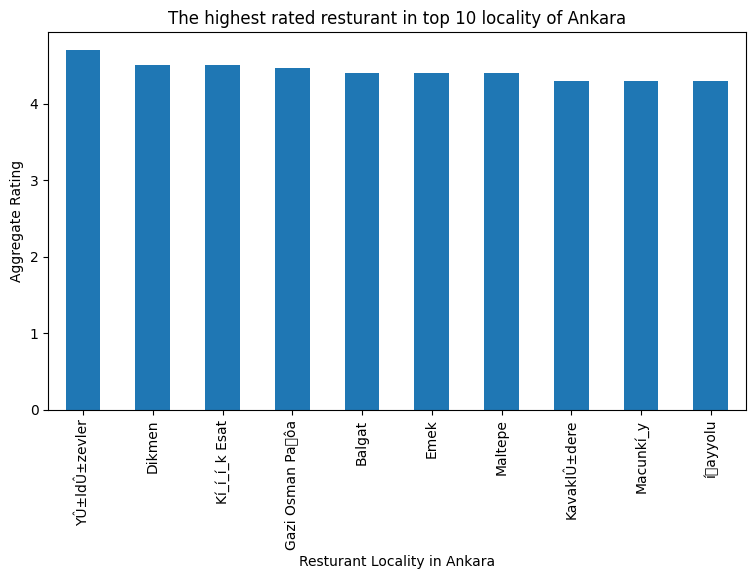

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Ankara')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


The best restarants are available in <b>Zevler, Dikmen area.</b>

## what places are have worst restaurants in Ankara?

c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0, flags=flags)


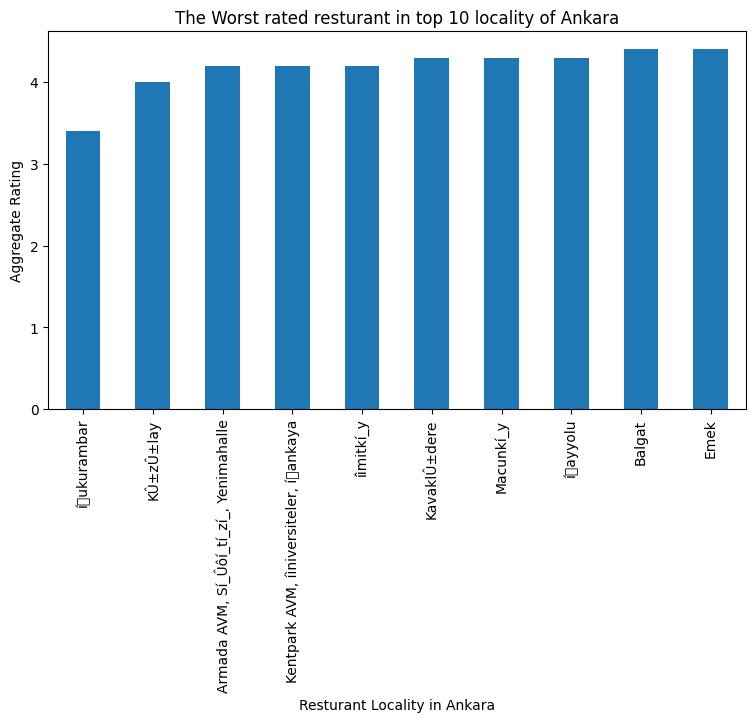

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Ankara')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in <b>Emek, Balgat.</b>

## Which place are suitable for edible person in Ankara city?

c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0, flags=flags)


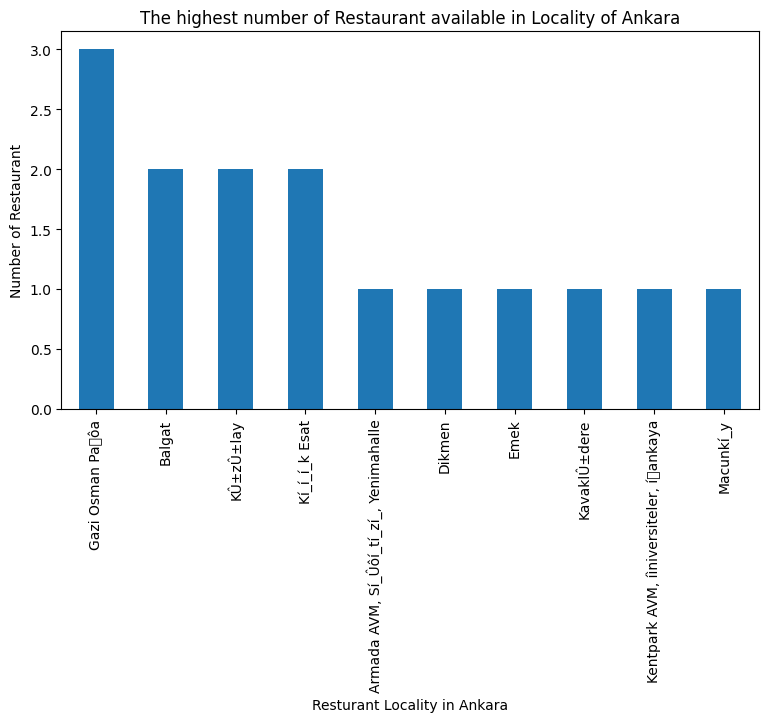

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Ankara')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>Gazi Osman Pasha</b> is the best places for edible person to stay there.

## Which place are not suitable for edible person in Ankara?

c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0, flags=flags)


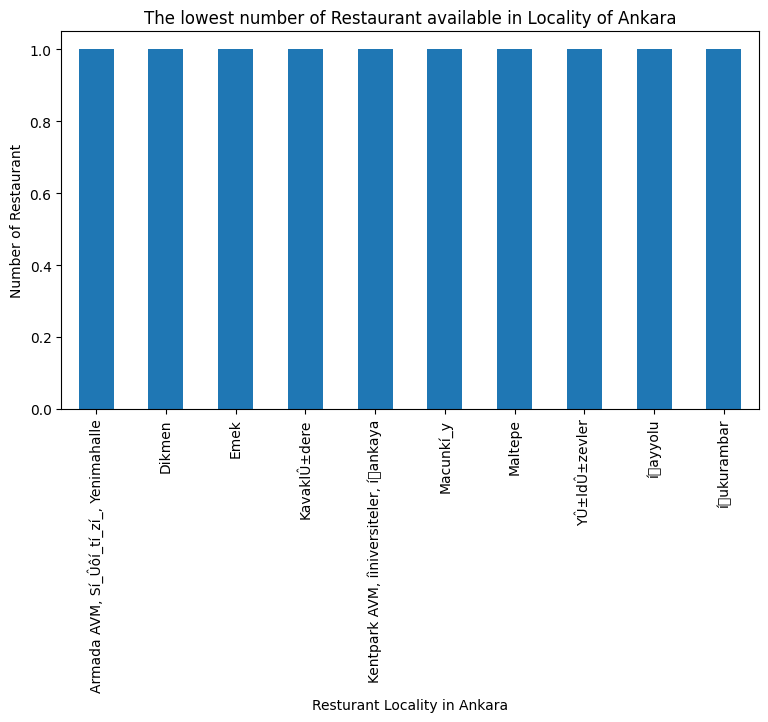

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Ankara')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for Turkish restaurant in Ankara city

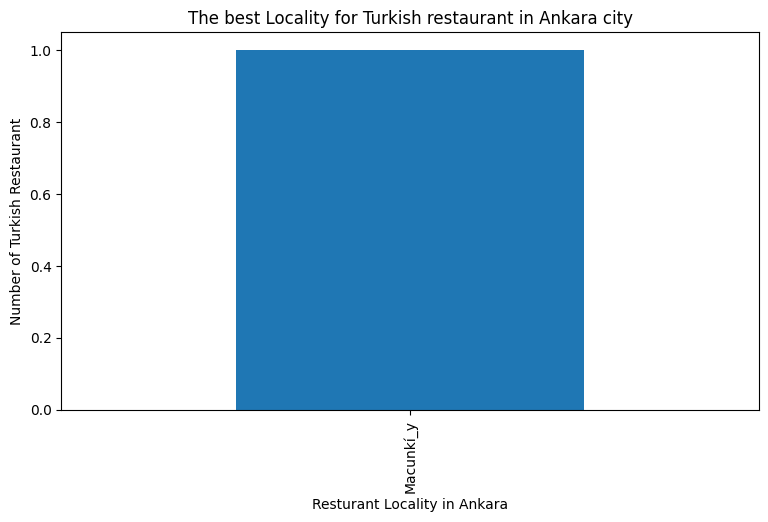

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Turkish restaurant in Ankara city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Turkish')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Number of Turkish Restaurant')

#displays the plot
plt.show()

<b>Machunki</b> is the best place for Turkish restaurant.

## which places are the best chinese resturants in Ankara?  

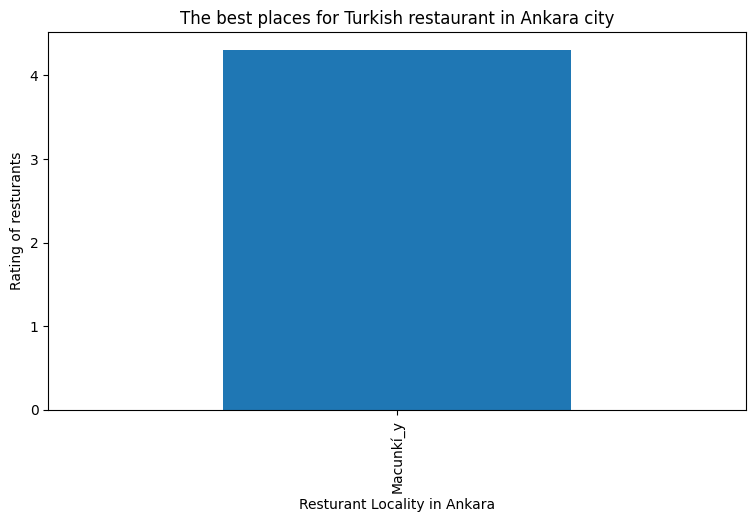

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Turkish restaurant in Ankara city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Turkish')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Ankara')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<b> Machunki</b> is best Turkish resturants.

### Data transformation
Based on Locality grouping the data

In [50]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [51]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",39.913206,32.809247,1,Cafe,4.200000,Very Good,134
1,Balgat,39.908335,32.820757,2,"Kebab, Kebab, Turkish Pizza",4.400000,"Excellent, Very Good",336
2,Dikmen,39.884872,32.846189,1,Kebab,4.500000,Excellent,231
3,Emek,39.916667,32.818833,1,"Kebab, Izgara",4.400000,Very Good,296
4,Gazi Osman Paôa,39.898593,32.866772,3,"World Cuisine, World Cuisine, Mexican, Italian...",4.466667,"Excellent, Very Good",307


In [52]:
df_final.shape

(15, 8)

## Define Foursquare Credentials and Version

In [53]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


## create a function to repeat the same process to all the Locality in Ankara

In [54]:
## create a function to repeat the same process to all the Locality in Ankara

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all Ankara Locality

In [55]:
# find the venues in all Ankara Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle
Balgat
Dikmen
Emek
Gazi Osman Paôa
KavaklÛ±dere
Kentpark AVM, íìniversiteler, íankaya
KÛ±zÛ±lay
Kí_í_í_k Esat
Macunkí_y
Maltepe
YÛ±ldÛ±zevler
íayyolu
íukurambar
íìmitkí_y


In [56]:
new_Delhi_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",39.913206,32.809247,Via Flat Yaşam Sokağı,39.914038,32.807901,General Entertainment
1,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",39.913206,32.809247,Paşabahçe,39.913190,32.808939,Furniture / Home Store
2,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",39.913206,32.809247,Harley-Davidson Ankara,39.913863,32.809345,Motorcycle Shop
3,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",39.913206,32.809247,Beymen,39.913255,32.808694,Clothing Store
4,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",39.913206,32.809247,Köz Biber Ocakbaşı,39.914190,32.807940,Kebab Restaurant


In [57]:
new_Delhi_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",95,95,95,95,95,95
Balgat,85,85,85,85,85,85
Dikmen,31,31,31,31,31,31
Emek,79,79,79,79,79,79
Gazi Osman Paôa,100,100,100,100,100,100
KavaklÛ±dere,100,100,100,100,100,100
"Kentpark AVM, íìniversiteler, íankaya",88,88,88,88,88,88
KÛ±zÛ±lay,100,100,100,100,100,100
Kí_í_í_k Esat,100,100,100,100,100,100


In [58]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 202 uniques categories.


In [60]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

,Locality,Arcade,Art Gallery,Art Studio,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,...,Turkish Home Cooking Restaurant,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Watch Shop,Wine Bar,Women's Store,Yoga Studio
0,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

,Locality,Arcade,Art Gallery,Art Studio,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,...,Turkish Home Cooking Restaurant,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Watch Shop,Wine Bar,Women's Store,Yoga Studio
0,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",0.000000,0.000000,0.00,0.000000,0.010526,0.010526,0.010526,0.00,0.000000,...,0.010526,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.010526
1,Balgat,0.011765,0.011765,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.023529,0.105882,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Dikmen,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.064516,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Emek,0.000000,0.000000,0.00,0.025316,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.113924,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Gazi Osman Paôa,0.000000,0.020000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.010000,0.020000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.010000
5,KavaklÛ±dere,0.010000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.030000,0.00,0.01,0.000000,0.000000,0.000000,0.01,0.020000,0.000000
6,"Kentpark AVM, íìniversiteler, íankaya",0.011364,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.011364,0.00,0.00,0.000000,0.000000,0.011364,0.00,0.022727,0.000000
7,KÛ±zÛ±lay,0.010000,0.020000,0.01,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,...,0.000000,0.010000,0.01,0.00,0.000000,0.000000,0.000000,0.00,0.010000,0.000000
8,Kí_í_í_k Esat,0.000000,0.010000,0.00,0.010000,0.000000,0.000000,0.000000,0.00,0.010000,...,0.000000,0.070000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Macunkí_y,0.000000,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.01,0.000000,...,0.010000,0.080000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.010000,0.000000


In [62]:
New_Delhi_grouped.shape

(15, 203)

In [63]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle----
            venue  freq
0            Café  0.08
1     Coffee Shop  0.06
2  Clothing Store  0.06
3          Lounge  0.05
4      Restaurant  0.05


----Balgat----
                venue  freq
0  Turkish Restaurant  0.11
1        Dessert Shop  0.08
2    Kebab Restaurant  0.08
3          Restaurant  0.05
4                Café  0.05


----Dikmen----
                           venue  freq
0           Gym / Fitness Center  0.13
1                           Café  0.06
2             Turkish Restaurant  0.06
3                           Park  0.06
4  Paper / Office Supplies Store  0.06


----Emek----
                venue  freq
0  Turkish Restaurant  0.11
1         Coffee Shop  0.09
2                Café  0.08
3    Kebab Restaurant  0.05
4                 Gym  0.05


----Gazi Osman Paôa----
                venue  freq
0          Restaurant  0.10
1               Hotel  0.08
2  Seafood Restaurant  0.06
3         Bridal Shop  0.05
4            Boutique  

In [64]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [65]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",Café,Clothing Store,Coffee Shop,Restaurant,Lounge,Hotel,Bar,Bookstore,Spa,Kebab Restaurant
1,Balgat,Turkish Restaurant,Kebab Restaurant,Dessert Shop,Restaurant,Electronics Store,Café,Pide Place,Hookah Bar,Seafood Restaurant,Coffee Shop
2,Dikmen,Gym / Fitness Center,Park,Café,Turkish Restaurant,Paper / Office Supplies Store,Restaurant,Pool,Food Court,Soccer Stadium,Campground
3,Emek,Turkish Restaurant,Coffee Shop,Café,Gym,Kebab Restaurant,Food,Park,Grocery Store,Bakery,Steakhouse
4,Gazi Osman Paôa,Restaurant,Hotel,Seafood Restaurant,Café,Boutique,Bridal Shop,Men's Store,Coffee Shop,Steakhouse,Kebab Restaurant
5,KavaklÛ±dere,Café,Pub,Meyhane,Theater,Gym,Hotel,Dessert Shop,Restaurant,Turkish Restaurant,Bakery
6,"Kentpark AVM, íìniversiteler, íankaya",Clothing Store,Coffee Shop,Comfort Food Restaurant,Kebab Restaurant,Shopping Mall,Restaurant,Sporting Goods Shop,Cosmetics Shop,Electronics Store,Café
7,KÛ±zÛ±lay,Café,Hotel,Coffee Shop,Bookstore,Pub,Music Venue,Dessert Shop,Bar,Music Store,Boarding House
8,Kí_í_í_k Esat,Café,Turkish Restaurant,Hotel,Coffee Shop,Doner Restaurant,Gym,Seafood Restaurant,Bakery,Snack Place,Sporting Goods Shop
9,Macunkí_y,Clothing Store,Turkish Restaurant,Café,Steakhouse,Coffee Shop,Men's Store,Restaurant,Cosmetics Shop,Electronics Store,Bakery


In [66]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(15,)

In [70]:
# add clustering labels
New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

c:\users\lzhomartova\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Armada AVM, Sí_Ûôí_tí_zí_, Yenimahalle",39.913206,32.809247,1,Cafe,4.200000,Very Good,134,1,Café,Clothing Store,Coffee Shop,Restaurant,Lounge,Hotel,Bar,Bookstore,Spa,Kebab Restaurant
1,Balgat,39.908335,32.820757,2,"Kebab, Kebab, Turkish Pizza",4.400000,"Excellent, Very Good",336,1,Turkish Restaurant,Kebab Restaurant,Dessert Shop,Restaurant,Electronics Store,Café,Pide Place,Hookah Bar,Seafood Restaurant,Coffee Shop
2,Dikmen,39.884872,32.846189,1,Kebab,4.500000,Excellent,231,3,Gym / Fitness Center,Park,Café,Turkish Restaurant,Paper / Office Supplies Store,Restaurant,Pool,Food Court,Soccer Stadium,Campground
3,Emek,39.916667,32.818833,1,"Kebab, Izgara",4.400000,Very Good,296,2,Turkish Restaurant,Coffee Shop,Café,Gym,Kebab Restaurant,Food,Park,Grocery Store,Bakery,Steakhouse
4,Gazi Osman Paôa,39.898593,32.866772,3,"World Cuisine, World Cuisine, Mexican, Italian...",4.466667,"Excellent, Very Good",307,1,Restaurant,Hotel,Seafood Restaurant,Café,Boutique,Bridal Shop,Men's Store,Coffee Shop,Steakhouse,Kebab Restaurant


In [71]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [72]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,39.894794,4.3,Very Good,126,0,Café,Kebab Restaurant,Meyhane,Coffee Shop,Dance Studio,Pharmacy,Seafood Restaurant,Gym / Fitness Center,Restaurant,Pub
14,39.891564,4.2,Very Good,152,0,Café,Kebab Restaurant,Coffee Shop,Tennis Stadium,Stationery Store,Chinese Restaurant,Dance Studio,Pub,Playground,Pizza Place


In [74]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,39.913206,4.200000,Very Good,134,1,Café,Clothing Store,Coffee Shop,Restaurant,Lounge,Hotel,Bar,Bookstore,Spa,Kebab Restaurant
1,39.908335,4.400000,"Excellent, Very Good",336,1,Turkish Restaurant,Kebab Restaurant,Dessert Shop,Restaurant,Electronics Store,Café,Pide Place,Hookah Bar,Seafood Restaurant,Coffee Shop
4,39.898593,4.466667,"Excellent, Very Good",307,1,Restaurant,Hotel,Seafood Restaurant,Café,Boutique,Bridal Shop,Men's Store,Coffee Shop,Steakhouse,Kebab Restaurant
5,39.907272,4.300000,Very Good,106,1,Café,Pub,Meyhane,Theater,Gym,Hotel,Dessert Shop,Restaurant,Turkish Restaurant,Bakery
7,39.917915,4.000000,"Good, Very Good",226,1,Café,Hotel,Coffee Shop,Bookstore,Pub,Music Venue,Dessert Shop,Bar,Music Store,Boarding House
8,39.906603,4.500000,"Excellent, Very Good",181,1,Café,Turkish Restaurant,Hotel,Coffee Shop,Doner Restaurant,Gym,Seafood Restaurant,Bakery,Snack Place,Sporting Goods Shop
11,39.876239,4.700000,Excellent,104,1,Restaurant,Café,Kebab Restaurant,Art Gallery,Hotel,Sandwich Place,Coffee Shop,Steakhouse,Lounge,Shop & Service
13,39.904709,3.400000,Average,115,1,Café,Kebab Restaurant,Coffee Shop,Restaurant,Dessert Shop,Pastry Shop,Department Store,Bistro,Electronics Store,Soup Place


In [75]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,39.916667,4.4,Very Good,296,2,Turkish Restaurant,Coffee Shop,Café,Gym,Kebab Restaurant,Food,Park,Grocery Store,Bakery,Steakhouse
10,39.922536,4.4,Very Good,131,2,Restaurant,Café,Fast Food Restaurant,Turkish Restaurant,Kokoreç Restaurant,Dance Studio,Park,Comfort Food Restaurant,Pool,Pizza Place


In [77]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,39.884872,4.5,Excellent,231,3,Gym / Fitness Center,Park,Café,Turkish Restaurant,Paper / Office Supplies Store,Restaurant,Pool,Food Court,Soccer Stadium,Campground


In [76]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,39.908957,4.2,Very Good,79,4,Clothing Store,Coffee Shop,Comfort Food Restaurant,Kebab Restaurant,Shopping Mall,Restaurant,Sporting Goods Shop,Cosmetics Shop,Electronics Store,Café
9,39.946278,4.3,Very Good,103,4,Clothing Store,Turkish Restaurant,Café,Steakhouse,Coffee Shop,Men's Store,Restaurant,Cosmetics Shop,Electronics Store,Bakery


### Conclusion 
- The best restarants are available in <b>Zevler, Dikmen area.</b> 
- The worst restarants are available in <b>Emek, Balgat.</b>
- <b> Machunki</b> is best Turkish resturants.